# Different traning times
This notebook is to study the effect of different trainint times on a seqence

In [1]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 12)

np.set_printoptions(suppress=True, precision=3)

sns.set(font_scale=3.5)

from network import Protocol, NetworkManager, BCPNNPerfect
from plotting_functions import plot_weight_matrix, plot_state_variables_vs_time, plot_winning_pattern
from plotting_functions import plot_network_activity, plot_network_activity_angle
from analysis_functions import calculate_recall_time_quantities, calculate_angle_from_history
from connectivity_functions import artificial_connectivity_matrix

## An example

0.125
epochs 0
epochs 1
epochs 2
[ 0.385  0.213  0.426  0.513  0.2    0.2    0.345  0.226  0.438  0.2  ]


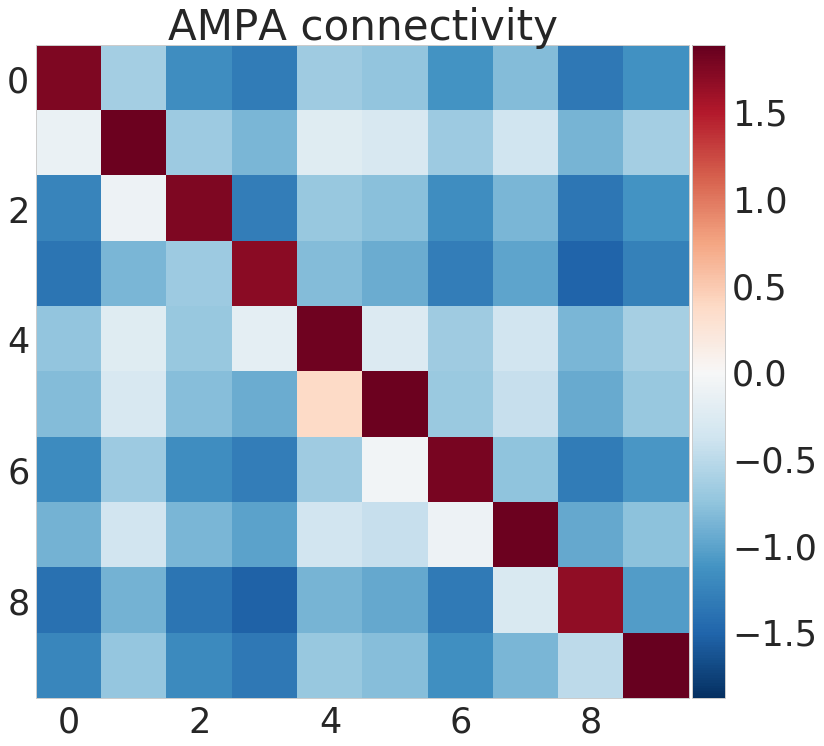

In [48]:
always_learning = False
k_perfect = True
perfect = False
strict_maximum = False

# First we run the training protocol
g_w_ampa = 2.0
g_w = 0.0
g_a = 10.0
tau_a = 0.250
G = 1.0
sigma = 0.0
tau_m = 0.20
tau_z_pre_ampa = 0.025
tau_z_post_ampa = 0.005
tau_p = 10.0

# Patterns parameters
hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o', 's', 'a', 'z_pre_ampa', 'w_ampa', 'p_pre_ampa', 'p_co_ampa']

# Protocol
training_time = 0.100
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
resting_time = 0.0
epochs = 3

# Scale
loc = 0.250
scale_percentage = 50.0
scale = loc * scale_percentage / 100.0
print(scale)


# Build the network
nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, sigma=sigma, G=G,
                  tau_z_pre_ampa=tau_z_pre_ampa, tau_z_post_ampa=tau_z_post_ampa, tau_p=tau_p, tau_m=tau_m,
                  z_transfer=False, diagonal_zero=False, strict_maximum=strict_maximum, perfect=perfect, 
                  k_perfect=k_perfect, always_learning=always_learning)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the protocol for training
protocol = Protocol()
patterns_indexes = [i for i in range(n_patterns)]
training_time = np.linspace(0.100, 0.0500, num=n_patterns)
training_time = np.random.normal(loc=loc, scale=scale, size=n_patterns)
training_time[training_time <= tau_m] = tau_m

# training_time = 0.020
protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                         inter_sequence_interval=inter_sequence_interval, epochs=epochs, resting_time=resting_time)

# Train
epoch_history = manager.run_network_protocol(protocol=protocol, verbose=True)

print(training_time)
plot_weight_matrix(manager.nn, ampa=True)

In [51]:
cmap = sns.color_palette("Reds_r", n_colors=n_patterns)

o = manager.history['o']
w = manager.history['w_ampa']
a = manager.history['a']
p_co = manager.history['p_co_ampa']
p = manager.history['p_pre_ampa']

time = np.linspace(0, manager.T_total, num=o.shape[0])

success 0.0


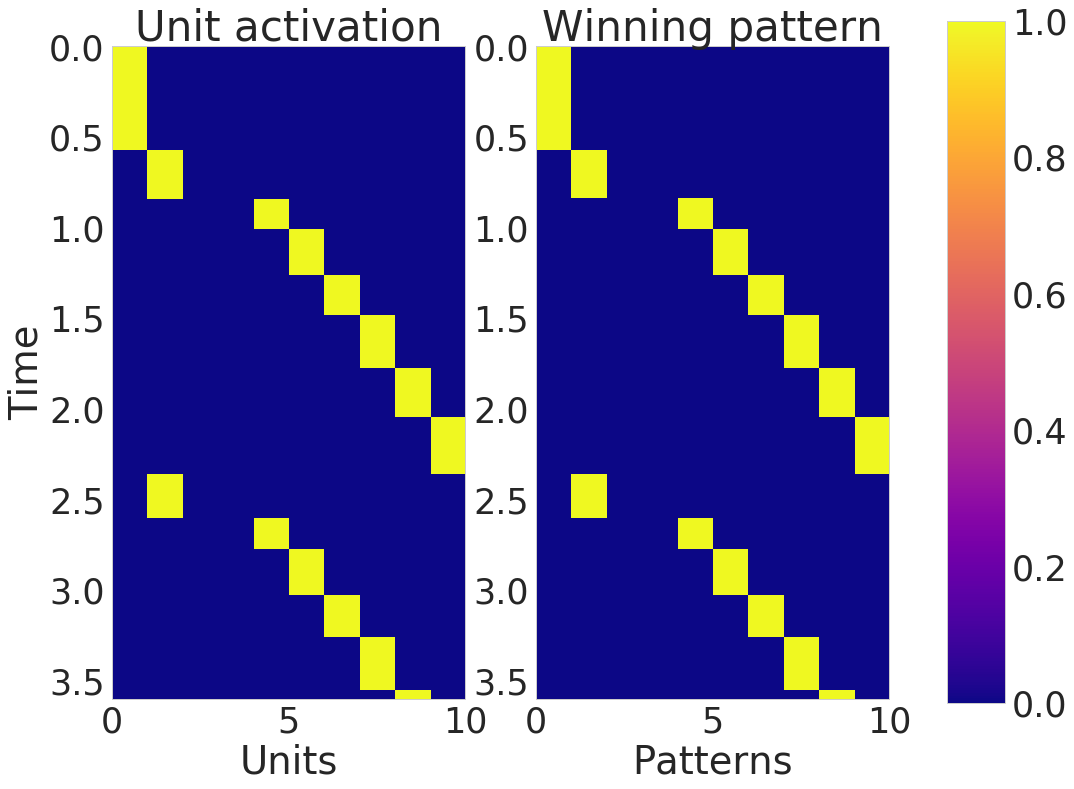

In [52]:
nn.strict_maximum = True
T_recall = 3.5
T_cue = 0.100
sequences = [patterns_indexes]
I_cue = 0.0
n = 1

aux = calculate_recall_time_quantities(manager, T_recall, T_cue, n, sequences)
total_sequence_time, mean, std, success, timings = aux
plot_network_activity_angle(manager)
print('success', success)

[ 0.385  0.213  0.426  0.513  0.2    0.2    0.345  0.226  0.438  0.2  ]


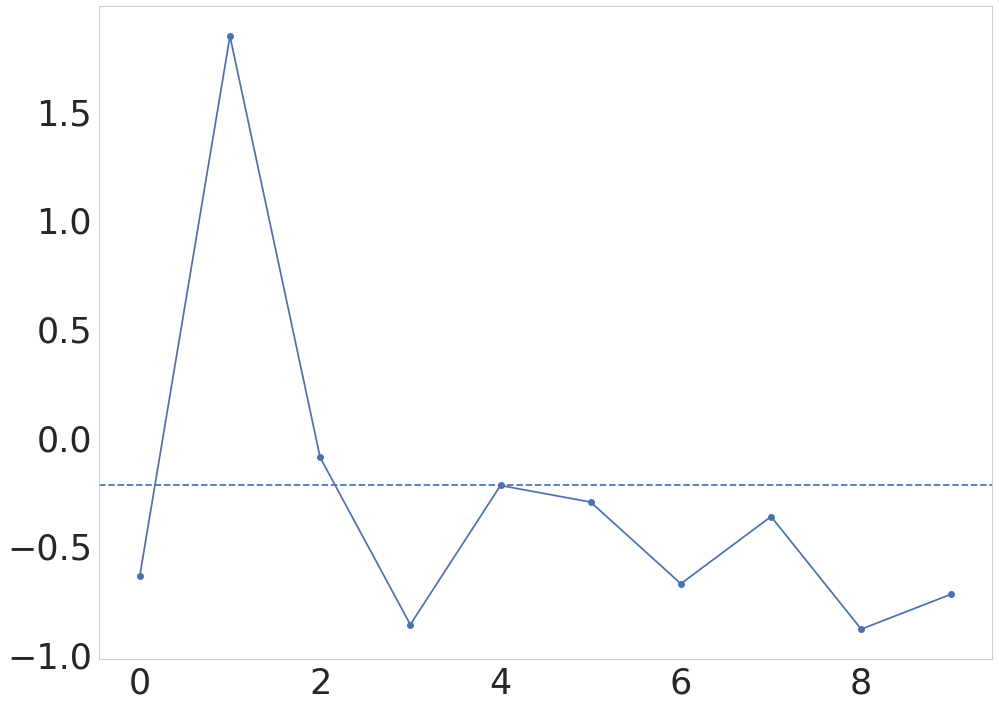

In [55]:
print(training_time)

lost = 1
lost_to = 4

plt.plot(nn.w_ampa[:, lost], 'o-')
plt.axhline(nn.w_ampa[lost_to, lost], ls='--')

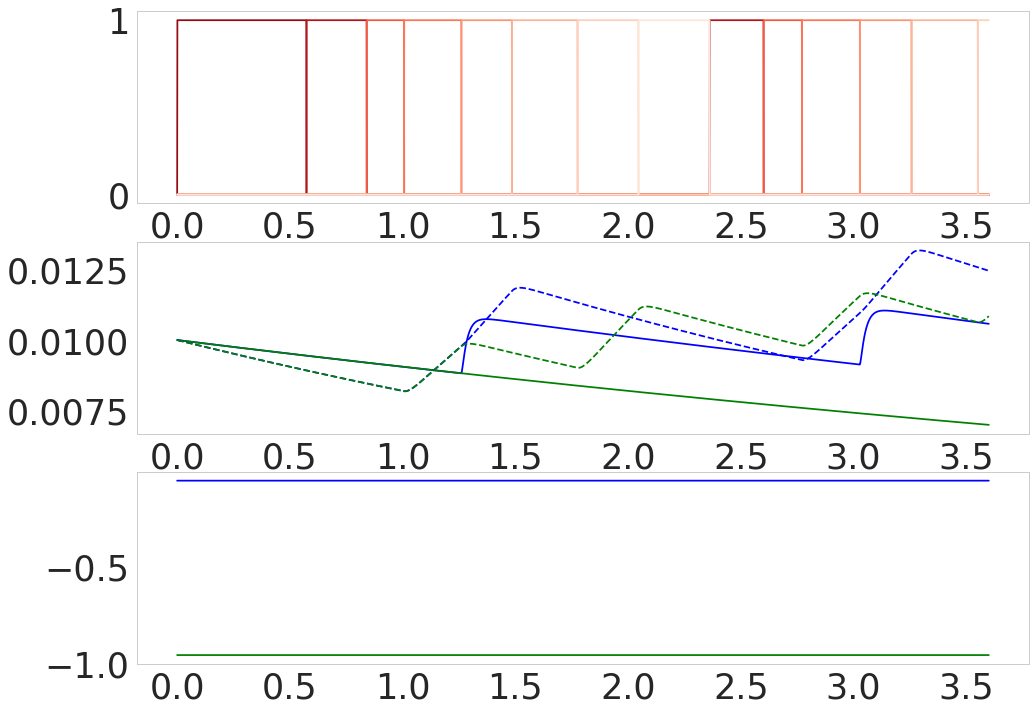

In [54]:
fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(311)
for pattern in patterns_indexes:
    ax1.plot(time, o[:, pattern], color=cmap[pattern])
    
ax2 = fig.add_subplot(312)
ax2.plot(time, p_co[:, lost + 1, lost], color='blue')
ax2.plot(time, p_co[:, lost_to, lost], color='green')

ax2.plot(time, p[:, lost] * p[:, lost + 1], '--', color='blue')
ax2.plot(time, p[:, lost] * p[:, lost_to], '--', color='green')

ax3  = fig.add_subplot(313)
ax3.plot(time, w[:, lost + 1, lost], color='blue')
ax3.plot(time, w[:, lost_to, lost], color='green');

## Characterise the gaussian distribution

In [80]:
always_learning = True
k_perfect = True

# First we run the training protocol
g_w_ampa = 2.0
g_w = 0.0
g_a = 10.0
tau_a = 0.250
G = 1.0
sigma = 0.0
tau_z_pre_ampa = 0.020
tau_z_post_ampa = 0.005
tau_p = 10.0

# Patterns parameters
hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o', 's']

# Protocol
training_time = 0.100
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
resting_time = 0.0
epochs = 3

# Recall
T_recall = 2.0
T_cue = 0.100
I_cue = 0.0
n = 1

loc = 0.500
num = 10
scale_vector = np.linspace(0.010, 0.100, num=num)
success_vector_scale = np.zeros(num)
persistence_time_vector_scale = np.zeros(num)

for index, scale in enumerate(scale_vector):
    # Build the network
    nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, sigma=sigma, G=G,
                      tau_z_pre_ampa=tau_z_pre_ampa, tau_z_post_ampa=tau_z_post_ampa, tau_p=tau_p, z_transfer=False,
                      diagonal_zero=False, strict_maximum=False, perfect=True, k_perfect=k_perfect,
                      always_learning=always_learning)

    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

    # Build the protocol for training
    protocol = Protocol()
    patterns_indexes = [i for i in range(n_patterns)]
    training_time = np.random.normal(loc=loc, scale=scale, size=n_patterns)
    training_time[training_time  <= 0.010] = 0.010
    protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                             inter_sequence_interval=inter_sequence_interval, epochs=epochs, resting_time=resting_time)

    # Train
    epoch_history = manager.run_network_protocol(protocol=protocol, verbose=False)

    nn.strict_maximum = True
    sequences = [patterns_indexes]


    aux = calculate_recall_time_quantities(manager, T_recall, T_cue, n, sequences)
    total_sequence_time, mean, std, success, timings = aux

    success_vector_scale[index] = success
    persistence_time_vector_scale[index] = mean

[ 0.497  0.492  0.498  0.504  0.525  0.507  0.471  0.492  0.502  0.493]
[ 0.501  0.509  0.464  0.485  0.495  0.516  0.501  0.504  0.485  0.515]
[ 0.48   0.446  0.528  0.509  0.508  0.477  0.518  0.495  0.506  0.521]
[ 0.522  0.433  0.537  0.563  0.574  0.511  0.489  0.45   0.486  0.463]
[ 0.467  0.452  0.468  0.494  0.459  0.516  0.544  0.472  0.553  0.499]
[ 0.587  0.491  0.48   0.507  0.476  0.433  0.558  0.388  0.51   0.467]
[ 0.537  0.481  0.505  0.441  0.468  0.527  0.506  0.529  0.528  0.506]
[ 0.439  0.569  0.577  0.498  0.603  0.422  0.503  0.366  0.643  0.441]
[ 0.51   0.502  0.46   0.513  0.529  0.524  0.309  0.475  0.364  0.289]
[ 0.518  0.404  0.432  0.716  0.463  0.461  0.554  0.461  0.592  0.39 ]


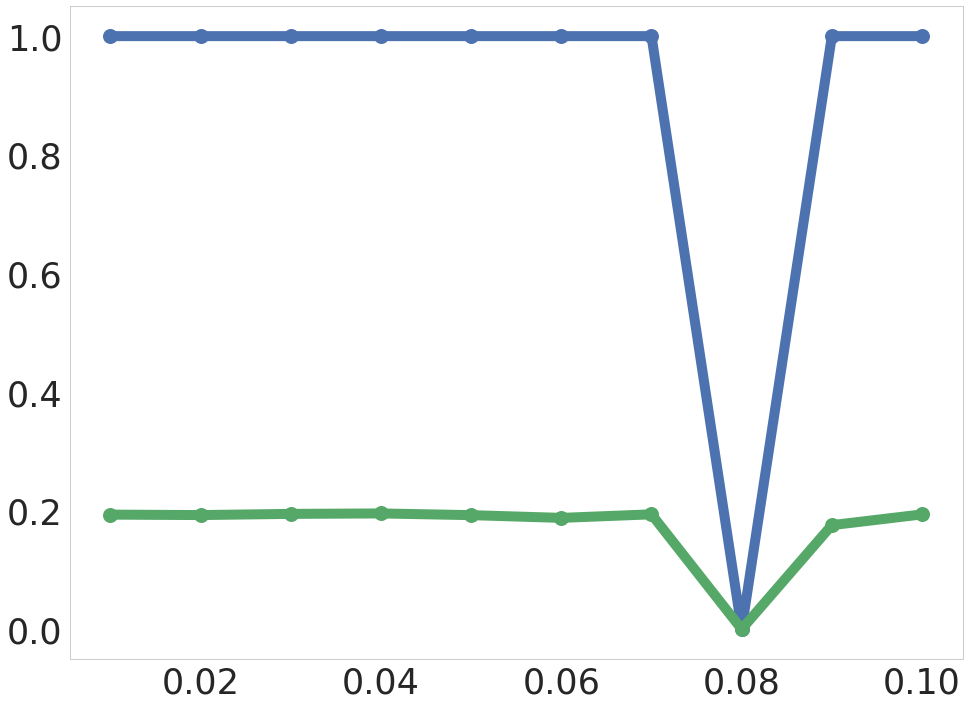

In [81]:
markersize = 15
linewidth = 10

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(scale_vector, success_vector_scale / 100.0, 'o-', markersize=markersize, linewidth=linewidth)
ax.plot(scale_vector, persistence_time_vector_scale, 'o-', markersize=markersize, linewidth=linewidth)

In [79]:
scale_vector

array([ 0.1  ,  0.122,  0.144,  0.167,  0.189,  0.211,  0.233,  0.256,
        0.278,  0.3  ])

#### With means
Here I characterise by running the process a lot of times and then averaging.

In [44]:
%%time

always_learning = True
k_perfect = True
perfect = False
strict_maximum = True

# First we run the training protocol
g_w_ampa = 2.0
g_w = 0.0
g_a = 10.0
tau_a = 0.250
G = 1.0
sigma = 0.0
tau_z_pre_ampa = 0.020
tau_z_post_ampa = 0.005
tau_p = 10.0

# Patterns parameters
hypercolumns = 1
minicolumns = 15
n_patterns = 15

# Manager properties
dt = 0.001
values_to_save = ['o', 's']

# Protocol
training_time = 0.100
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
resting_time = 0.0
epochs = 3

# Recall
T_recall = 4.5
T_cue = 0.100
I_cue = 0.0
n = 1

loc = 0.500
num = 10
trials = 10
scale_vector = np.linspace(0.010, 0.300, num=num)
success_vector_scale = np.zeros((num, trials))
persistence_time_vector_scale = np.zeros((num, trials))
training_times = np.zeros((num, trials, n_patterns))

for index, scale in enumerate(scale_vector):
    print(index)
    print(mean)
    print(minicolumns * mean)
    print('----------')
    for trial_index in range(trials):
        # Build the network
        nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, sigma=sigma, G=G,
                          tau_z_pre_ampa=tau_z_pre_ampa, tau_z_post_ampa=tau_z_post_ampa, tau_p=tau_p, z_transfer=False,
                          diagonal_zero=False, strict_maximum=strict_maximum, perfect=perfect, k_perfect=k_perfect,
                          always_learning=always_learning)

        # Build the manager
        manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

        # Build the protocol for training
        protocol = Protocol()
        patterns_indexes = [i for i in range(n_patterns)]
        training_time = np.random.normal(loc=loc, scale=scale, size=n_patterns)
        training_time[training_time  <= 0.010] = 0.010
        protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                                 inter_sequence_interval=inter_sequence_interval, epochs=epochs, resting_time=resting_time)

        # Train
        epoch_history = manager.run_network_protocol(protocol=protocol, verbose=False)

        nn.strict_maximum = True
        sequences = [patterns_indexes]


        aux = calculate_recall_time_quantities(manager, T_recall, T_cue, n, sequences)
        total_sequence_time, mean, std, success, timings = aux
       
        success_vector_scale[index, trial_index] = success
        persistence_time_vector_scale[index, trial_index] = mean
        training_times[index, trial_index, :] = training_time


0
[ 1.   1.   0.9  0.9  1.   0.4  0.2  0.1  0.1  0.1]
[ 15.   15.   13.5  13.5  15.    6.    3.    1.5   1.5   1.5]
----------
1
0.273769230769
4.10653846154
----------
2
0.280307692308
4.20461538462
----------
3
0.271384615385
4.07076923077
----------
4
0.274538461538
4.11807692308
----------
5
0.257
3.855
----------
6
0.255076923077
3.82615384615
----------
7
0.280692307692
4.21038461538
----------
8
0.261384615385
3.92076923077
----------
9
0
0
----------
CPU times: user 8min 44s, sys: 532 ms, total: 8min 44s
Wall time: 8min 44s


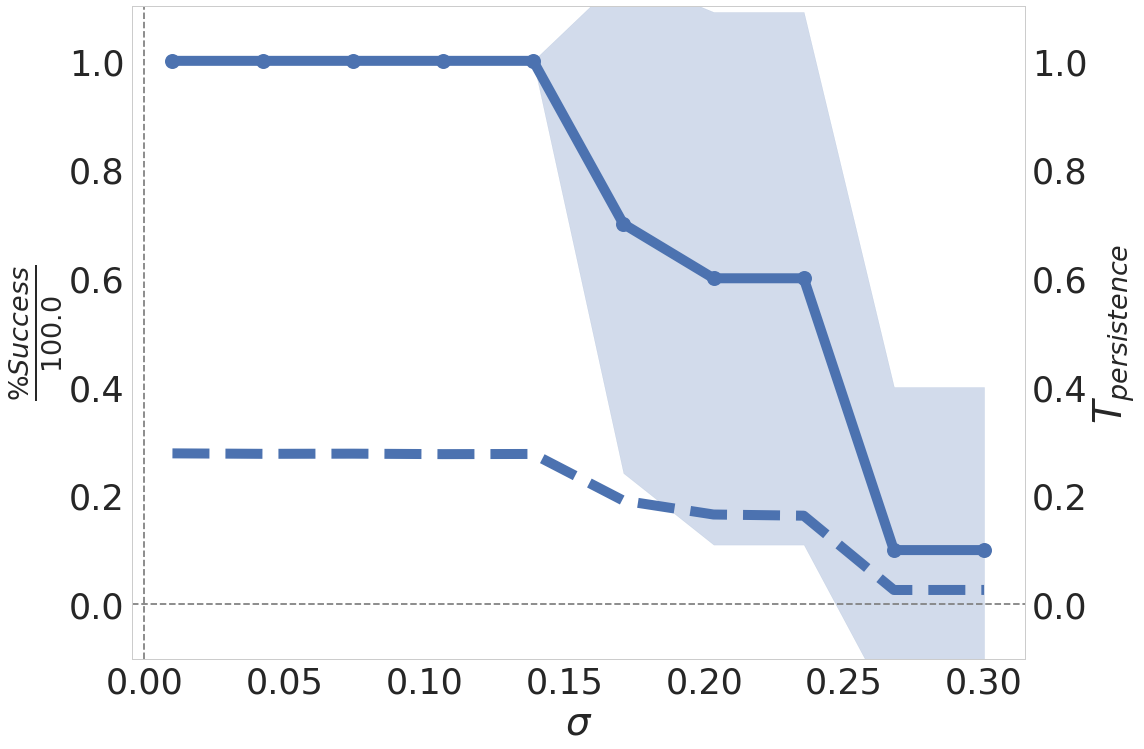

In [45]:
markersize = 15
linewidth = 10

index = 0

mean = success_vector_scale.mean(axis=1) / 100.0
persitence = persistence_time_vector_scale.mean(axis=1)
std = success_vector_scale.std(axis=1) / 100.0
current_palette = sns.color_palette()

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
ax.plot(scale_vector, mean, 'o-', color=current_palette[index], markersize=markersize, linewidth=linewidth, label='success')
ax.fill_between(scale_vector, mean - std, mean + std, color=current_palette[index], alpha=0.25)


ax2.plot(scale_vector, persitence , '--', markersize=markersize, linewidth=linewidth)

ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'$\frac{\%Success}{100.0}$')
ax2.set_ylabel(r'$T_{persistence}$')

ax.set_ylim([-0.1, 1.1])
ax2.set_ylim([-0.1, 1.1])

ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray');